# Regression example

## Import Data

In [1]:
import pandas as pd
from sklearn import datasets

In [2]:
diabetes = datasets.load_diabetes()

In [3]:
print(diabetes.DESCR)

Diabetes dataset

Notes
-----

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attributes:
    :Age:
    :Sex:
    :Body mass index:
    :Average blood pressure:
    :S1:
    :S2:
    :S3:
    :S4:
    :S5:
    :S6:

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani

In [4]:
dataset=pd.DataFrame(diabetes['data'],columns=diabetes['feature_names'])
dataset['target']=diabetes['target']

In [5]:
dataset.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


## Clean Data

In [6]:
# The data is already clean!

## Explore Data

In [7]:
import matplotlib.pyplot as plt

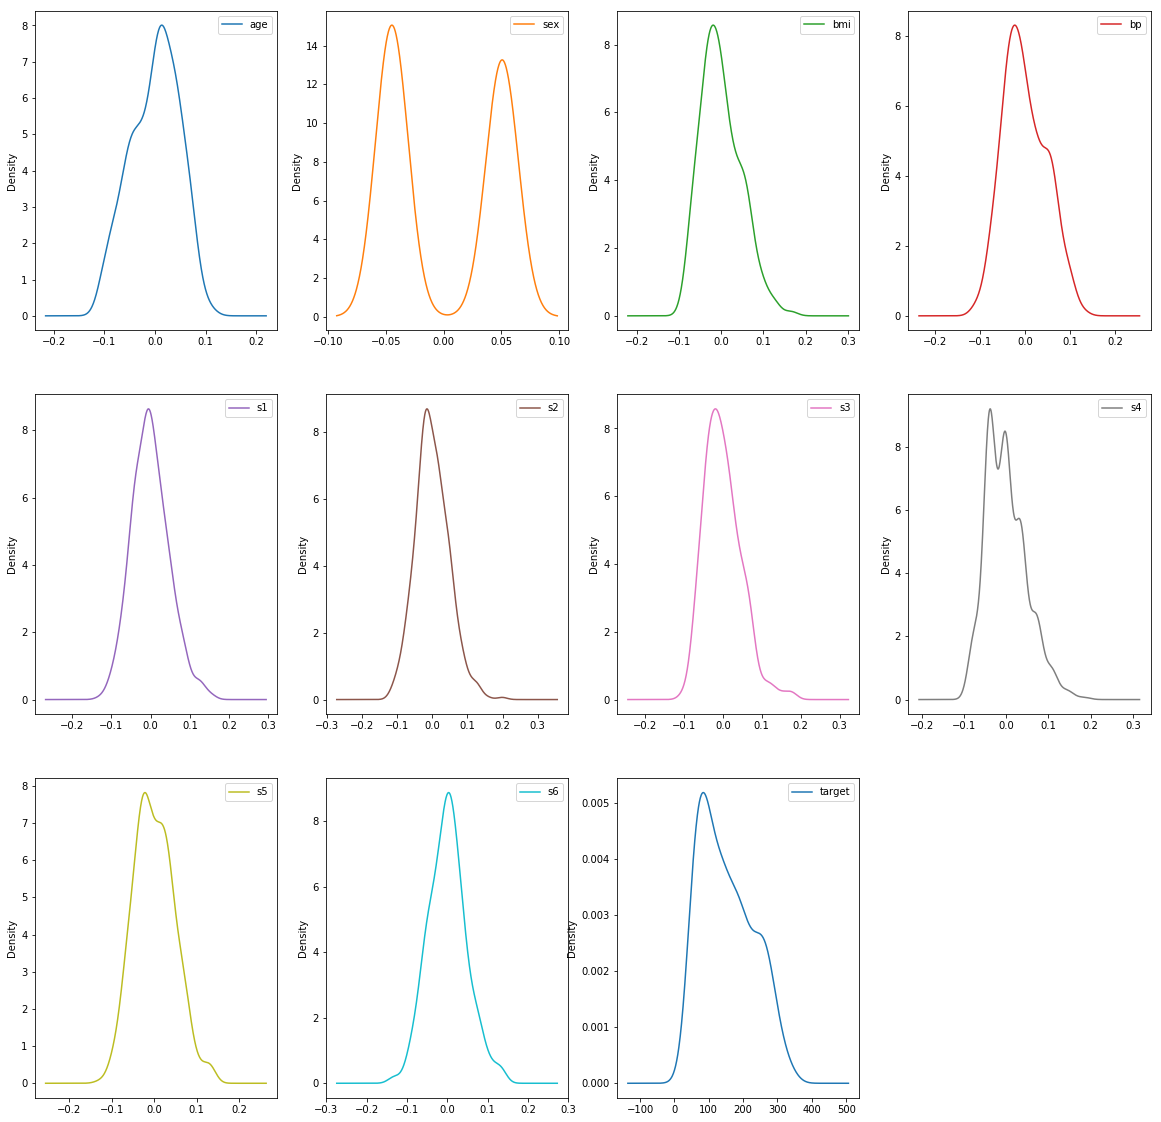

In [8]:
# each variable
dataset.plot(kind='density', subplots=True, layout=(3,4), sharex=False, sharey=False,figsize=(20,20))
plt.show()

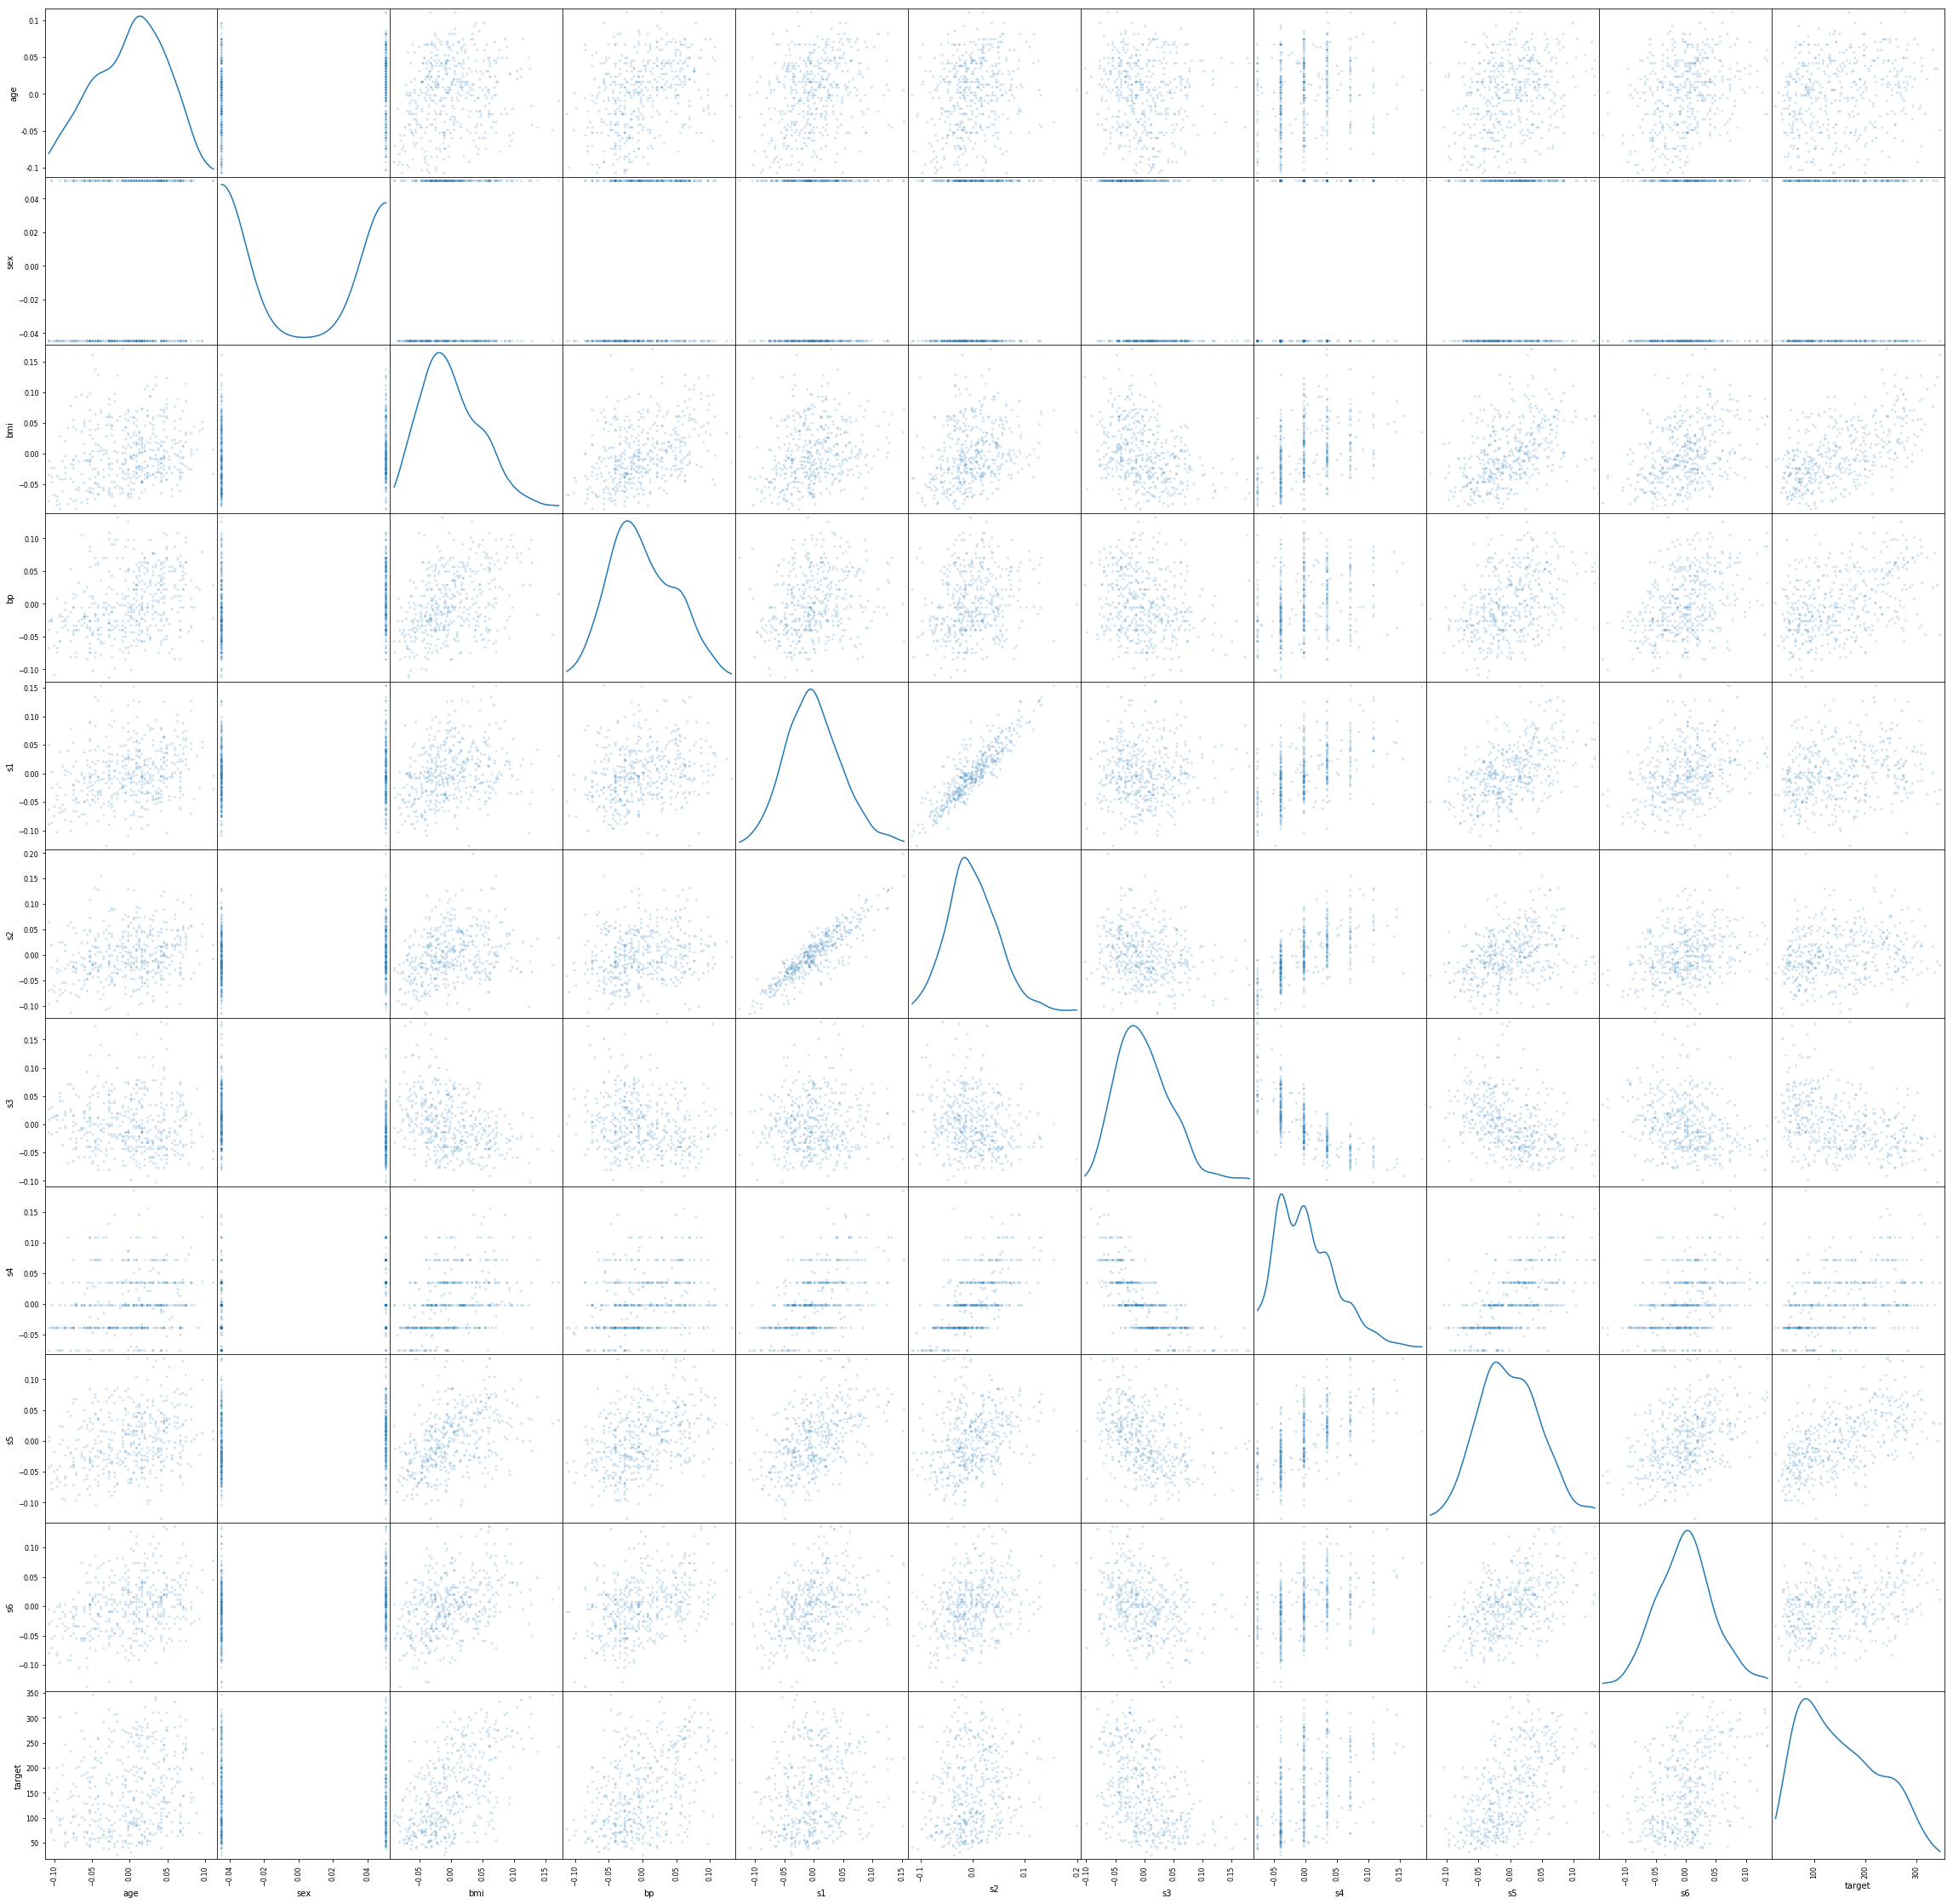

In [9]:
# correlations?
pd.plotting.scatter_matrix(dataset,alpha=0.2, figsize=(40, 40), diagonal='kde')
plt.show()

## Split Data

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X=dataset['bmi'] # Lets only use one feature
y=dataset['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

## Model training

In [12]:
from sklearn import linear_model

In [13]:
model = linear_model.LinearRegression()

# Train the model using the training sets
model.fit(X_train.reshape(-1, 1), y_train.reshape(-1, 1))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Test and Evaluate

In [14]:
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
# Make predictions using the testing set
y_predictions = model.predict(X_test.reshape(-1, 1))

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test.reshape(-1, 1), y_predictions))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test.reshape(-1, 1), y_predictions))

Mean squared error: 3835.44
Variance score: 0.37


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  import sys


## Show results

In [16]:
# The coefficients
print('Coefficients: \n', model.coef_)
print('Intercept: \n', model.intercept_)

Coefficients: 
 [[ 955.62706895]]
Intercept: 
 [ 152.09801011]


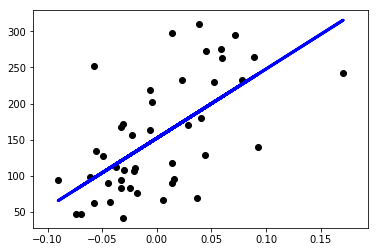

In [17]:
# 
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_predictions, color='blue', linewidth=3)

plt.show()

## Exercise

1. Can you improve your score if you use more than one feature?
2. How would you implement crossvalidation? search and try.
3. Can you use another model for this regression? try another one.